In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
car = pd.read_csv('C:/Users/jycha/Downloads/car.data.csv')

In [3]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
car.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [5]:
car.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in car.columns:
    car[i]=le.fit_transform(car[i])
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [15]:
#Splitting the data into training and test test
X = car.iloc[:,0:6].values
y = car.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [17]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [19]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(30,input_shape=(6,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                210       
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,084
Trainable params: 1,084
Non-trainable params: 0
_________________________________________________________________


In [20]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 11ms/step - loss: 0.7358 - accuracy: 0.6872 - val_loss: 0.6845 - val_accuracy: 0.6561
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.7429 - val_loss: 0.5853 - val_accuracy: 0.7341
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7719 - val_loss: 0.5761 - val_accuracy: 0.7601
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.7791 - val_loss: 0.4643 - val_accuracy: 0.7775
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8240 - val_loss: 0.4847 - val_accuracy: 0.7890
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8443 - val_loss: 0.4009 - val_accuracy: 0.8035
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8421 - val_loss: 0.3623 - val_accuracy: 0.8410
Epoch 8/100


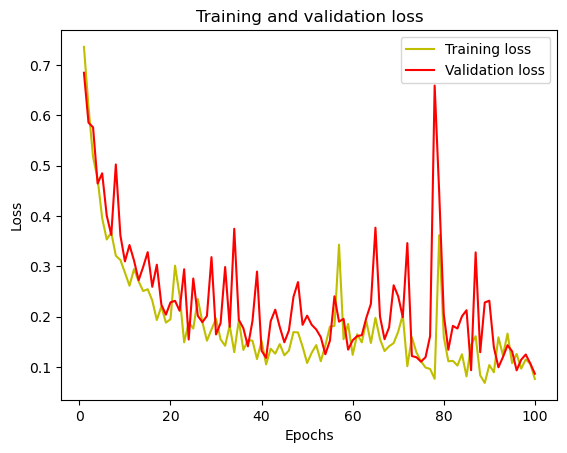

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

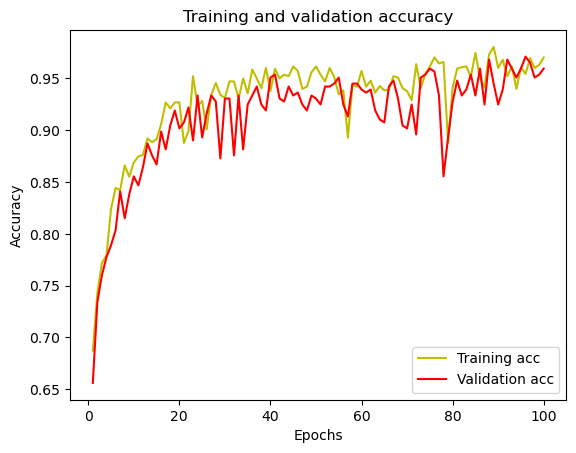

In [22]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        77
           1       0.62      0.93      0.74        14
           2       0.99      0.99      0.99       239
           3       0.89      1.00      0.94        16

    accuracy                           0.96       346
   macro avg       0.87      0.94      0.90       346
weighted avg       0.97      0.96      0.96       346

[[ 66   8   2   1]
 [  0  13   0   1]
 [  2   0 237   0]
 [  0   0   0  16]]
